In [1]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import warnings
warnings.filterwarnings(action='ignore')

#한글 폰트 설정
plt.rcParams['font.family'] = 'HYGothic-Extra'

data = pd.read_csv('company_nps_data.csv', encoding='cp949')

cor_id = [294337,294367,294387,403359,403434,403462,419945,420046,469458,469677] #선정된 id들 : 10개

df = data.loc[data['회사ID'].isin(cor_id)]
df

,회사ID,연매출액,년도,월,월별_연금보험료,월별_직원수
757,420046,607302624,2018,4,126999240,425
1431,403359,156550808,2018,12,373921480,1196
1439,294337,287134819,2018,5,410699340,2021
2760,294367,633160910,2017,8,269094200,932
2823,294337,146274359,2016,11,306936920,1540
...,...,...,...,...,...,...
99353,420046,488179570,2017,5,112913540,397
99415,403359,140810131,2016,6,287342220,1019
99494,403462,157122353,2018,3,152198000,399
99724,294387,150451803,2017,9,161888520,768


In [2]:
df.sort_values(by=['회사ID','년도','월'], inplace=True)

In [3]:
df.reset_index(inplace=True)
df.drop('index', axis=1, inplace=True)
#df.drop('level_0',axis=1, inplace=True)
df

,회사ID,연매출액,년도,월,월별_연금보험료,월별_직원수
0,294337,102579741,2015,11,244699780,1202
1,294337,102579741,2015,12,265217820,1318
2,294337,146274359,2016,1,266212980,1305
3,294337,146274359,2016,2,274833900,1350
4,294337,146274359,2016,3,276378820,1350
...,...,...,...,...,...,...
370,469677,108023614,2018,8,126135120,545
371,469677,108023614,2018,9,124187640,536
372,469677,108023614,2018,10,127180360,547
373,469677,108023614,2018,11,127590260,555


# 성장률

### 매출 증가율 col 생성 및 추가

In [4]:
# 매출액 증가율 함수
# (공식) 매출액증가율(%) = (당기매출액-전기매출액)/전기매출 *100

def sales_up_rate(company_id):
    temp = df.loc[df['회사ID'] == company_id, :]
    
    # '회사ID', '년도', '월' 기준으로 오름차순 정렬한 데이터프레임 생성 
    sorted_df = temp.sort_values(by=['회사ID', '년도', '월'], axis=0)
    sorted_df.reset_index(drop=True, inplace=True)
    
    # 회사 id별로 매출액 증가율 계산 
    sales_rate = sorted_df.drop_duplicates(['연매출액'], keep = 'first')
    sales_rate['매출액증가율'] = 0
    
    for i in range(1, len(sales_rate)):
        sales_rate['매출액증가율'].iloc[i] = round((sales_rate['연매출액'].iloc[i]-sales_rate['연매출액'].iloc[i-1])
        /sales_rate['연매출액'].iloc[i-1]*100, 4)
   
    # 필요없는 컬럼 정리
    sales_rate.drop(['월', '월별_연금보험료', '월별_직원수'], axis=1, inplace=True)
    
    #최종 데이터 프레임 리턴
    return sales_rate  # 데이터 프레임 리턴

In [5]:
d294337 = sales_up_rate(cor_id[0])
d294337

,회사ID,연매출액,년도,매출액증가율
0,294337,102579741,2015,0.0000
2,294337,146274359,2016,42.5958
14,294337,192586665,2017,31.6613
26,294337,287134819,2018,49.0938


In [6]:
d294367 = sales_up_rate(cor_id[1])
d294367

,회사ID,연매출액,년도,매출액증가율
0,294367,601303965,2015,0.0000
2,294367,535249090,2016,-10.9853
14,294367,633160910,2017,18.2928
26,294367,875661976,2019,38.3001


In [7]:
d294387 = sales_up_rate(cor_id[2])
d294387

,회사ID,연매출액,년도,매출액증가율
0,294387,132543154,2015,0.0000
2,294387,153057557,2016,15.4775
14,294387,150451803,2017,-1.7025
26,294387,168291675,2018,11.8575


In [8]:
d403359 = sales_up_rate(cor_id[3])
d403359

,회사ID,연매출액,년도,매출액증가율
0,403359,132314221,2015,0.0000
2,403359,140810131,2016,6.4210
14,403359,147618546,2017,4.8352
26,403359,156550808,2018,6.0509


In [9]:
d403434 = sales_up_rate(cor_id[4])
d403434

,회사ID,연매출액,년도,매출액증가율
0,403434,139353875,2015,0.0000
2,403434,147323098,2016,5.7187
14,403434,150446694,2017,2.1202
26,403434,169810428,2018,12.8708


In [10]:
d403462 = sales_up_rate(cor_id[5])
d403462

,회사ID,연매출액,년도,매출액증가율
0,403462,125610912,2015,0.0000
2,403462,133208061,2016,6.0482
14,403462,156731364,2017,17.6591
26,403462,157122353,2018,0.2495


In [11]:
d419945 = sales_up_rate(cor_id[6])
d419945

,회사ID,연매출액,년도,매출액증가율
0,419945,7108279325,2016,0.0000
12,419945,7853891952,2017,10.4894
24,419945,8391469199,2018,6.8447
36,419945,10058868796,2019,19.8702


In [12]:
d420046 = sales_up_rate(cor_id[7])
d420046

,회사ID,연매출액,년도,매출액증가율
0,420046,396063681,2016,0.0000
12,420046,488179570,2017,23.2578
24,420046,607302624,2018,24.4015


In [13]:
d469458 = sales_up_rate(cor_id[8])
d469458

,회사ID,연매출액,년도,매출액증가율
0,469458,97075344,2015,0.0000
1,469458,112817883,2016,16.2168
13,469458,113442446,2017,0.5536


In [14]:
d469677 = sales_up_rate(cor_id[9])
d469677

,회사ID,연매출액,년도,매출액증가율
0,469677,48624183,2015,0.0000
2,469677,60309282,2016,24.0315
14,469677,83821545,2017,38.9861
26,469677,108023614,2018,28.8733


In [15]:
growth = pd.concat([d294337, d294367, d294387, d403359, d403434, d403462, d419945, d420046, d469458, d469677])
growth.reset_index(inplace=True)
growth.drop('index',axis=1,inplace=True)
growth

,회사ID,연매출액,년도,매출액증가율
0,294337,102579741,2015,0.0000
1,294337,146274359,2016,42.5958
2,294337,192586665,2017,31.6613
3,294337,287134819,2018,49.0938
4,294367,601303965,2015,0.0000
5,294367,535249090,2016,-10.9853
6,294367,633160910,2017,18.2928
7,294367,875661976,2019,38.3001
8,294387,132543154,2015,0.0000
9,294387,153057557,2016,15.4775


# 데이터 조인 

In [16]:
# left join

df_merge = pd.merge(df, growth, how = 'left', on = ('회사ID','연매출액','년도'))
df_merge

,회사ID,연매출액,년도,월,월별_연금보험료,월별_직원수,매출액증가율
0,294337,102579741,2015,11,244699780,1202,0.0000
1,294337,102579741,2015,12,265217820,1318,0.0000
2,294337,146274359,2016,1,266212980,1305,42.5958
3,294337,146274359,2016,2,274833900,1350,42.5958
4,294337,146274359,2016,3,276378820,1350,42.5958
...,...,...,...,...,...,...,...
370,469677,108023614,2018,8,126135120,545,28.8733
371,469677,108023614,2018,9,124187640,536,28.8733
372,469677,108023614,2018,10,127180360,547,28.8733
373,469677,108023614,2018,11,127590260,555,28.8733


In [17]:
df_merge.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 375 entries, 0 to 374
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   회사ID      375 non-null    int64  
 1   연매출액      375 non-null    int64  
 2   년도        375 non-null    int64  
 3   월         375 non-null    int64  
 4   월별_연금보험료  375 non-null    int64  
 5   월별_직원수    375 non-null    int64  
 6   매출액증가율    375 non-null    float64
dtypes: float64(1), int64(6)
memory usage: 23.4 KB


In [18]:
df_merge['년도'] = df_merge['년도'].astype(str)
df_merge['월'] = df_merge['월'].astype(str)

In [19]:
df_merge.isnull().sum()

회사ID        0
연매출액        0
년도          0
월           0
월별_연금보험료    0
월별_직원수      0
매출액증가율      0
dtype: int64

In [20]:
#df_merge.describe()

### 조건
- 기업별 보유 데이터가 최소 24개월(2년) 이상일것
- 상시 근로자수(직원수) 최소 10명 이상 기업일것

In [21]:
df_merge.groupby('회사ID').count() # 전부 '최소 2년 이상(24개월)' 조건 충족

,연매출액,년도,월,월별_연금보험료,월별_직원수,매출액증가율
회사ID,,,,,,
294337,38,38,38,38,38,38
294367,38,38,38,38,38,38
294387,38,38,38,38,38,38
403359,38,38,38,38,38,38
403434,38,38,38,38,38,38
403462,38,38,38,38,38,38
419945,48,48,48,48,48,48
420046,36,36,36,36,36,36
469458,25,25,25,25,25,25


### 직원 수 10명 이상 충족하는지?

In [22]:
emp_over10 = df_merge.loc[df_merge.월별_직원수 >= 10]
emp_over10 # 종업원이 10명 이상인 데이터프레임 생성

,회사ID,연매출액,년도,월,월별_연금보험료,월별_직원수,매출액증가율
0,294337,102579741,2015,11,244699780,1202,0.0000
1,294337,102579741,2015,12,265217820,1318,0.0000
2,294337,146274359,2016,1,266212980,1305,42.5958
3,294337,146274359,2016,2,274833900,1350,42.5958
4,294337,146274359,2016,3,276378820,1350,42.5958
...,...,...,...,...,...,...,...
370,469677,108023614,2018,8,126135120,545,28.8733
371,469677,108023614,2018,9,124187640,536,28.8733
372,469677,108023614,2018,10,127180360,547,28.8733
373,469677,108023614,2018,11,127590260,555,28.8733


In [23]:
# 연도+월 col 생성 및 추가
연도월 = emp_over10['년도'].map(str) + "_" + emp_over10['월'].map(str) #연도와 월 합침
emp_over10.insert(2, '연도월',연도월)
emp_over10

,회사ID,연매출액,연도월,년도,월,월별_연금보험료,월별_직원수,매출액증가율
0,294337,102579741,2015_11,2015,11,244699780,1202,0.0000
1,294337,102579741,2015_12,2015,12,265217820,1318,0.0000
2,294337,146274359,2016_1,2016,1,266212980,1305,42.5958
3,294337,146274359,2016_2,2016,2,274833900,1350,42.5958
4,294337,146274359,2016_3,2016,3,276378820,1350,42.5958
...,...,...,...,...,...,...,...,...
370,469677,108023614,2018_8,2018,8,126135120,545,28.8733
371,469677,108023614,2018_9,2018,9,124187640,536,28.8733
372,469677,108023614,2018_10,2018,10,127180360,547,28.8733
373,469677,108023614,2018_11,2018,11,127590260,555,28.8733


In [24]:
emp_over10.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 375 entries, 0 to 374
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   회사ID      375 non-null    int64  
 1   연매출액      375 non-null    int64  
 2   연도월       375 non-null    object 
 3   년도        375 non-null    object 
 4   월         375 non-null    object 
 5   월별_연금보험료  375 non-null    int64  
 6   월별_직원수    375 non-null    int64  
 7   매출액증가율    375 non-null    float64
dtypes: float64(1), int64(4), object(3)
memory usage: 26.4+ KB


In [25]:
def employee_bar(data,x,y):
    plt.rcParams['figure.figsize'] = [15,5]
    
    sns.barplot(data=data, x=x, y=y)
    plt.axhline(y=10, color='r', linewidth=3)    
    plt.xticks(rotation=-45)
    plt.show()

In [26]:
def employee_line(data, x, y):
    plt.rcParams['figure.figsize'] = [15,5]
    
    sns.lineplot(x=x,y=y,data=data)
    plt.axhline(y=10, color='r', linewidth=2)
    plt.xticks(rotation=-45)
    plt.show()

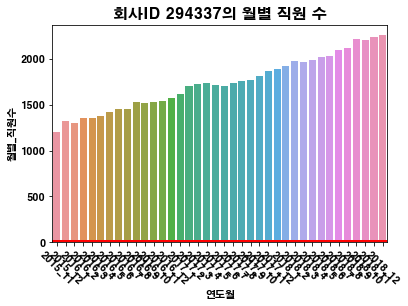

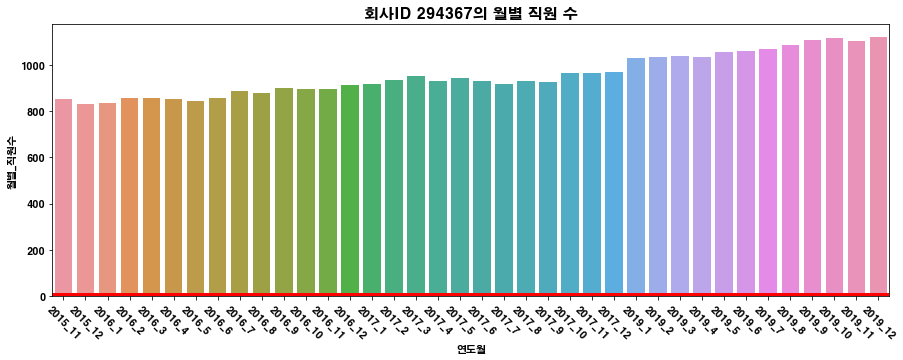

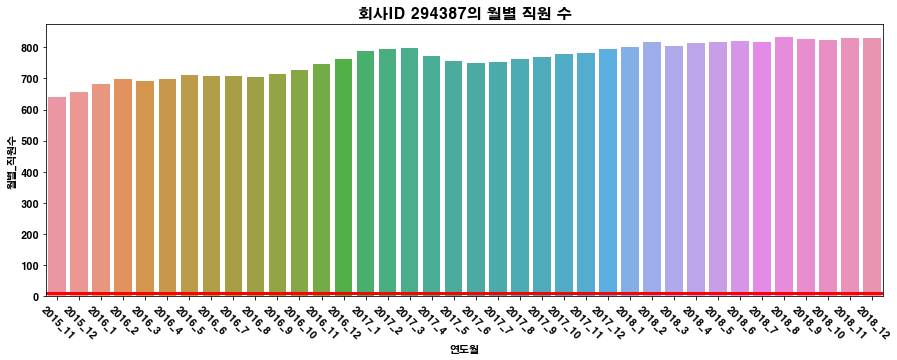

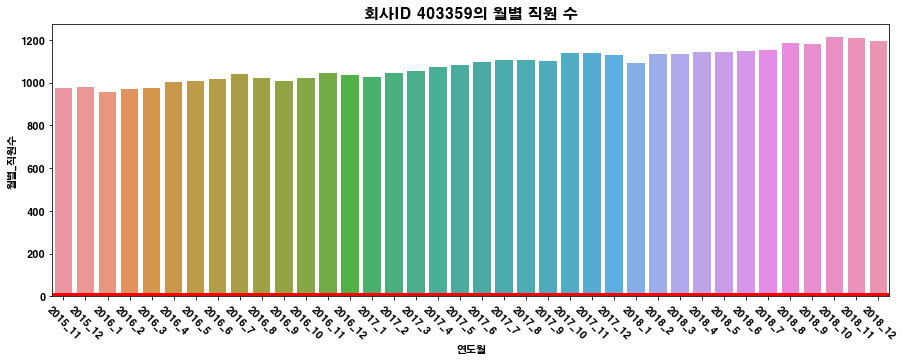

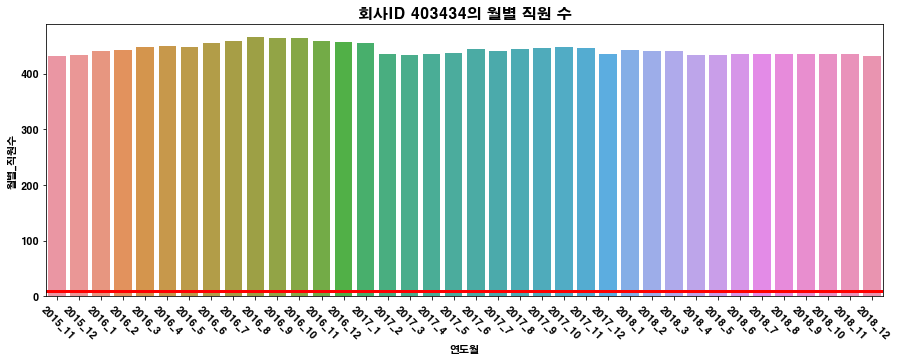

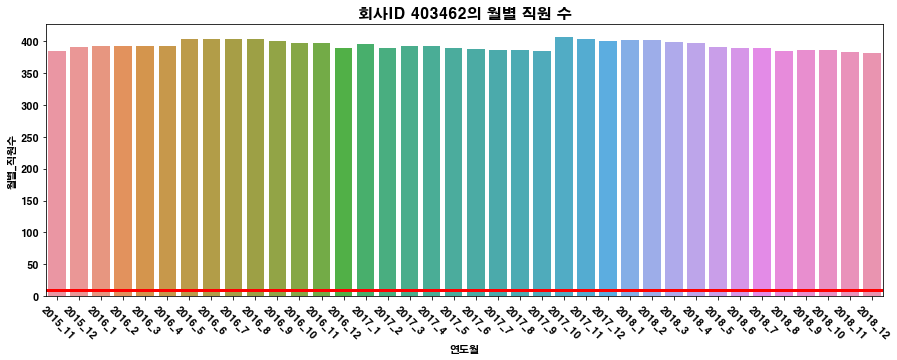

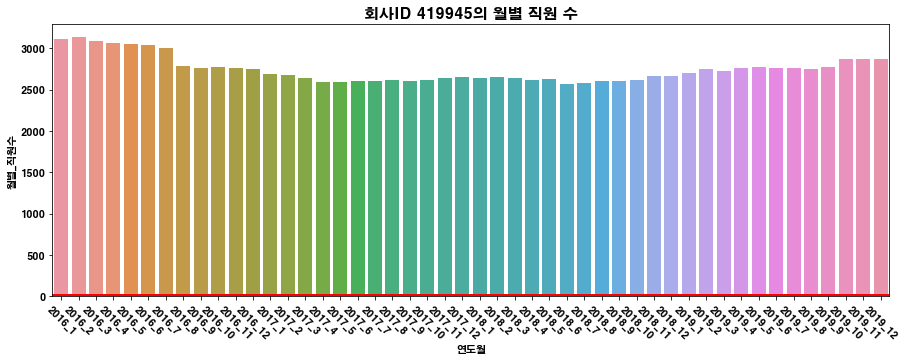

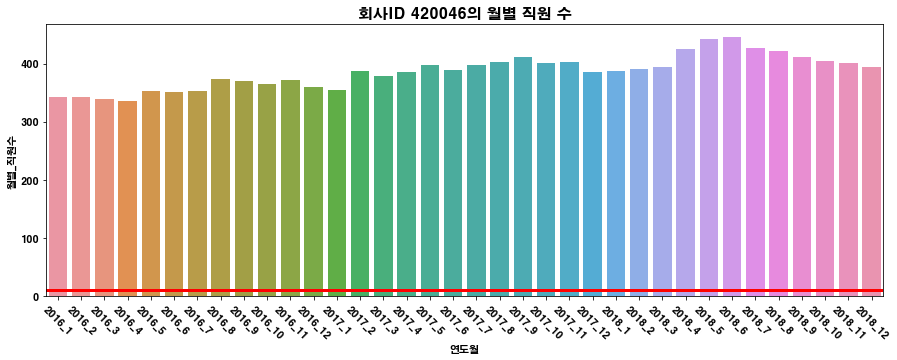

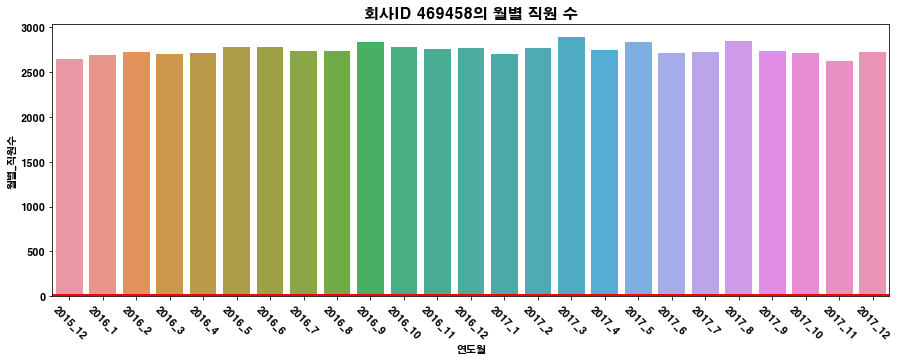

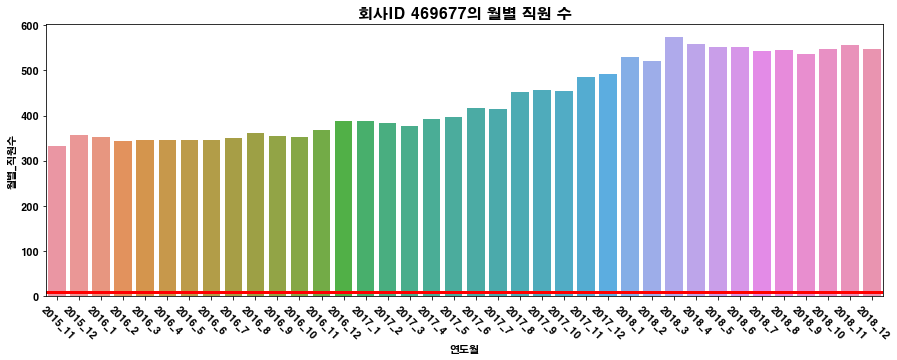

In [27]:
# bar chart

cor_id = emp_over10['회사ID'].unique().tolist()

for i in range(len(cor_id)):
    e = emp_over10.loc[emp_over10['회사ID'] == cor_id[i]]
    plt.title("회사ID " + str(cor_id[i]) + "의 월별 직원 수", fontsize=15)
    employee_bar(e, e['연도월'],e['월별_직원수'])

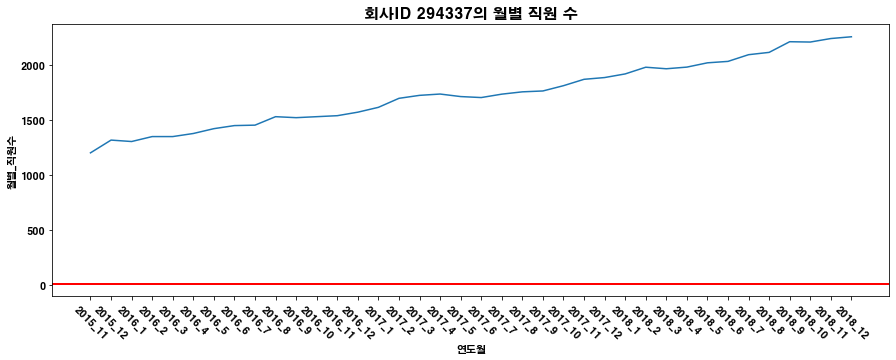

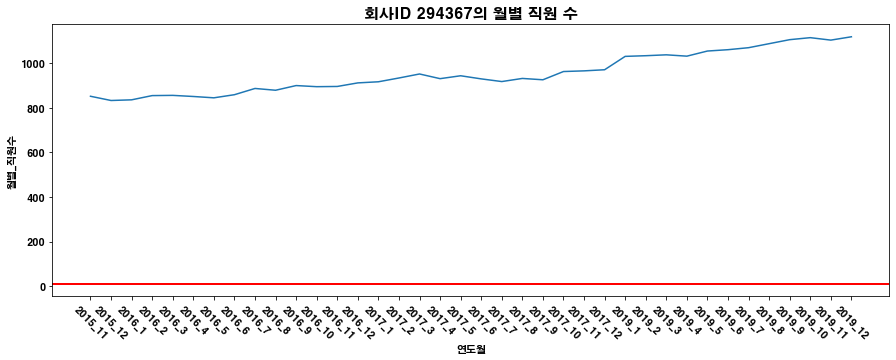

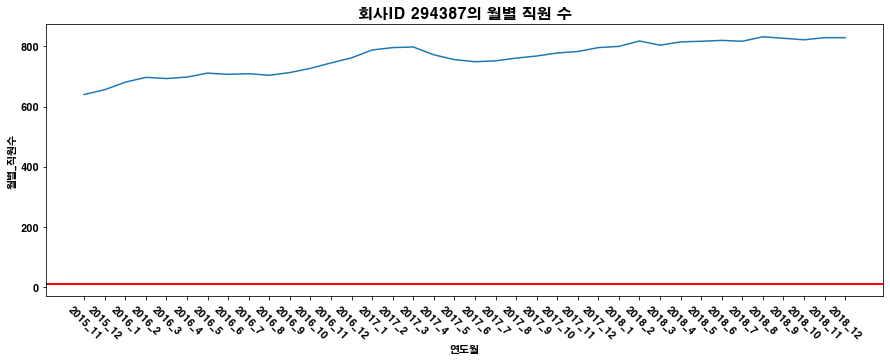

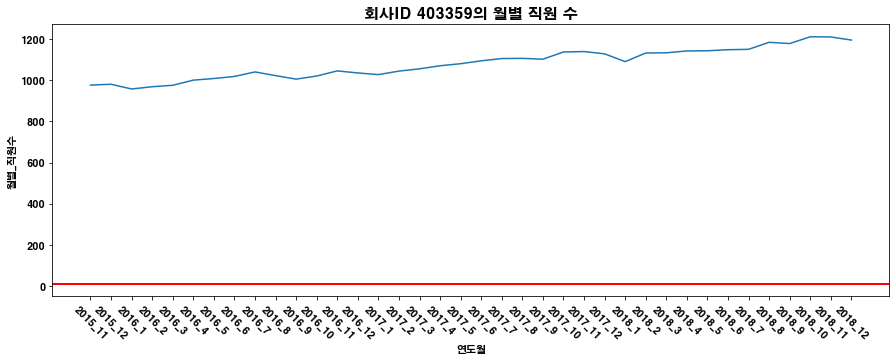

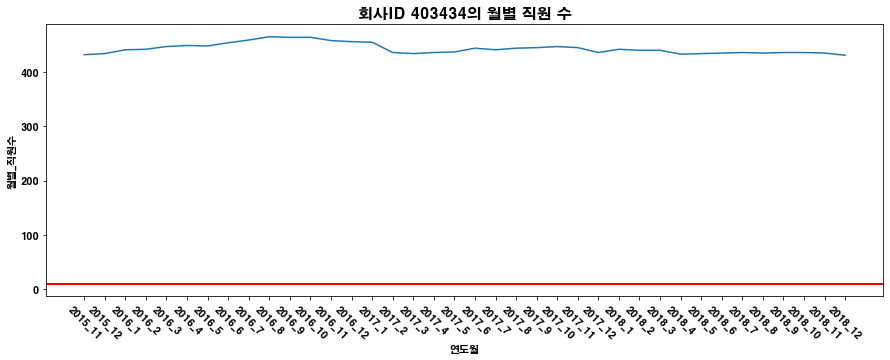

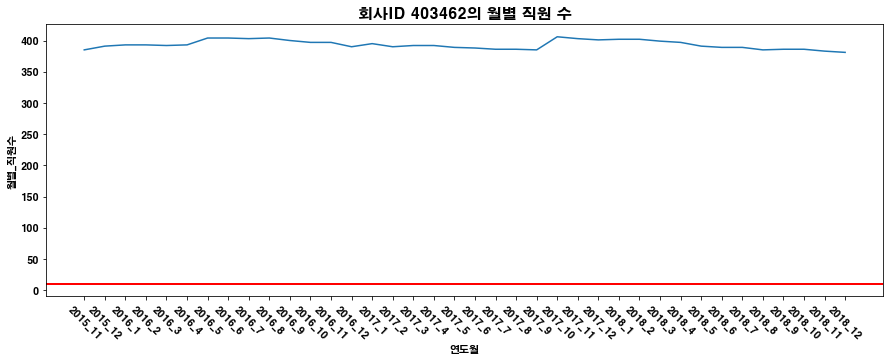

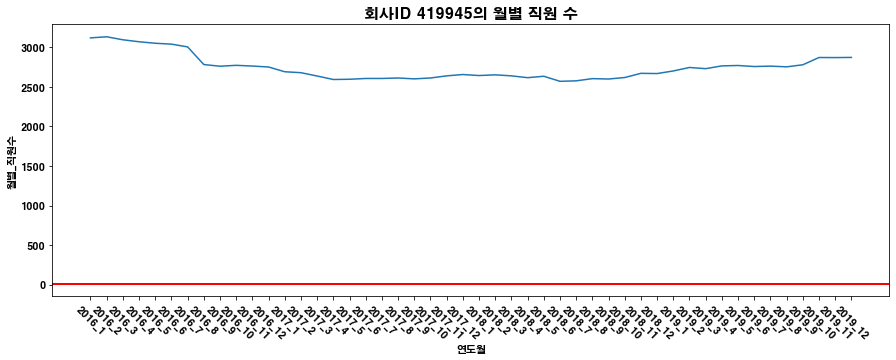

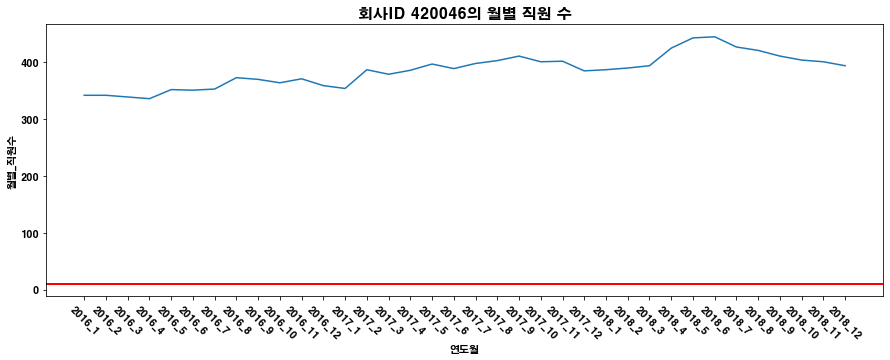

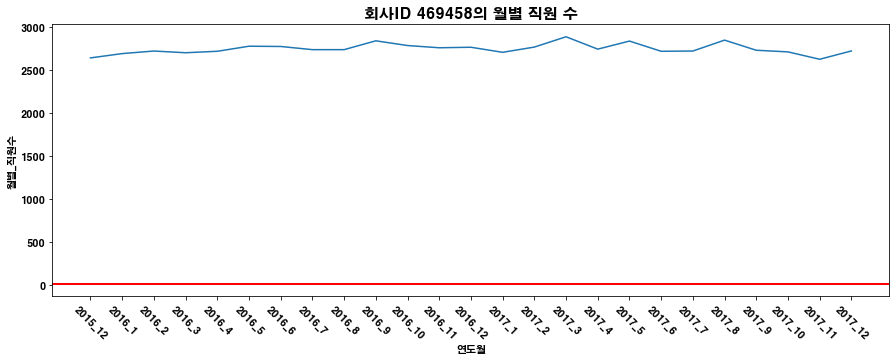

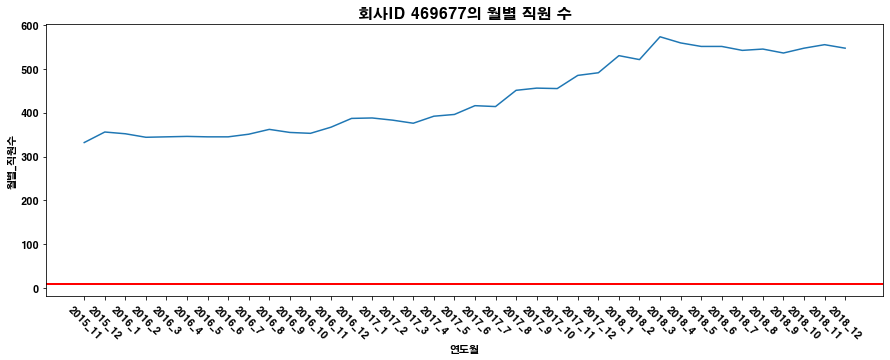

In [28]:
# line chart

cor_id = emp_over10['회사ID'].unique().tolist()

for i in range(len(cor_id)):
    e = emp_over10.loc[emp_over10['회사ID'] == cor_id[i]]
    plt.title("회사ID " + str(cor_id[i]) + "의 월별 직원 수", fontsize=15)
    employee_line(e, e['연도월'],e['월별_직원수'])

- 10개의 모든 회사가 직원 수 최소 10명 이상임을 확인

### 매출 증가율 그래프

In [29]:
def growth():
    cor_id = emp_over10['회사ID'].unique().tolist()
    
    for i in range(len(cor_id)):
        fig, ax1 = plt.subplots()
        e = emp_over10.loc[emp_over10['회사ID'] == cor_id[i]]
        
        ax1.bar(e['년도'],e['연매출액'], color='lightsteelblue', alpha=0.4, width=0.7)
        # https://matplotlib.org/3.2.1/gallery/color/named_colors.html : 색상표
        ax1.set_xlabel('년도')
        ax1.set_ylabel('매출액 증가율(%)')

        ax2 = ax1.twinx()
        ax2.plot(e['년도'], e['매출액증가율'],'-s', color='navy', markersize=7, linewidth=5, alpha=1)
        
        plt.axhline(y=20, color='r', linewidth=1, ls='--') # 매출 증가율 20%을 기준으로 line 그린 것        
        plt.title("회사ID " + str(cor_id[i]) + "의 연매출액(bar)과 매출 증가율(line)", fontsize=15)
        plt.show()

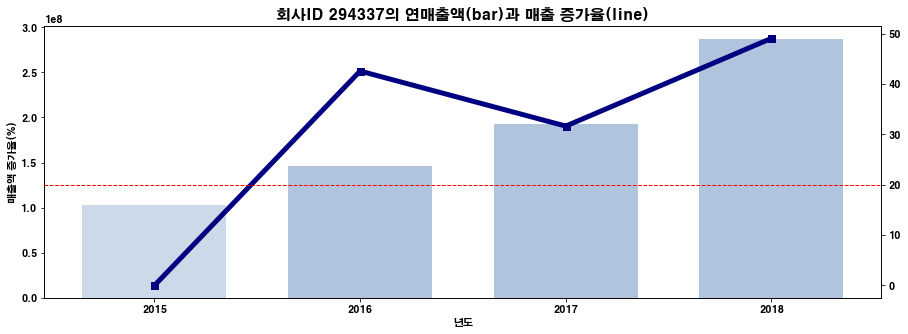

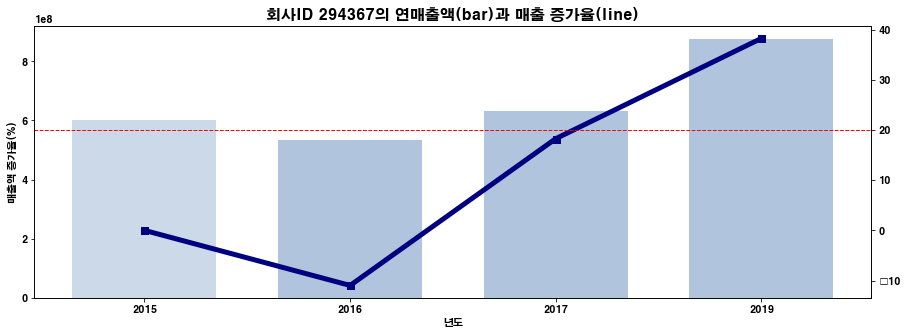

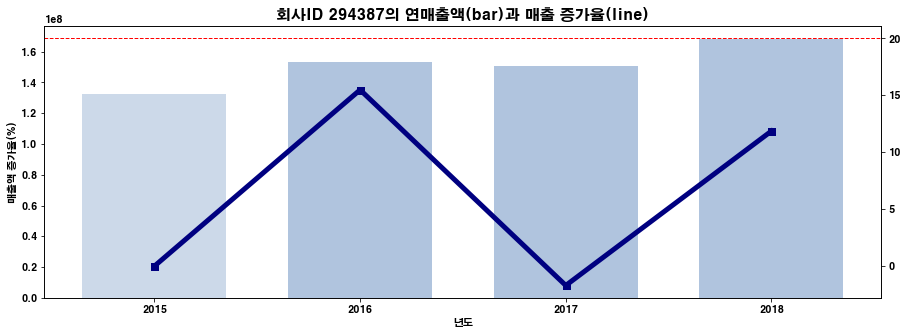

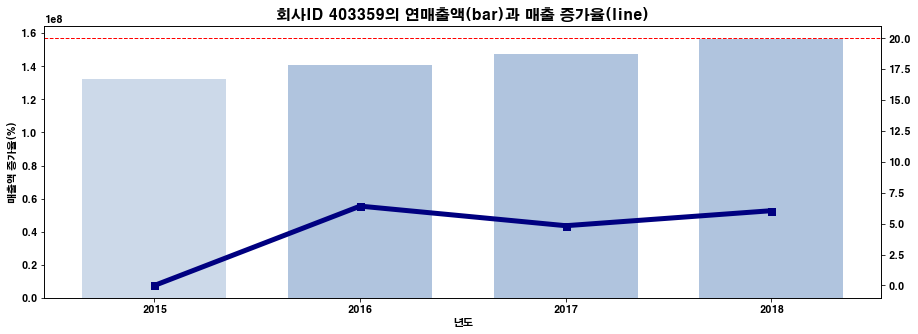

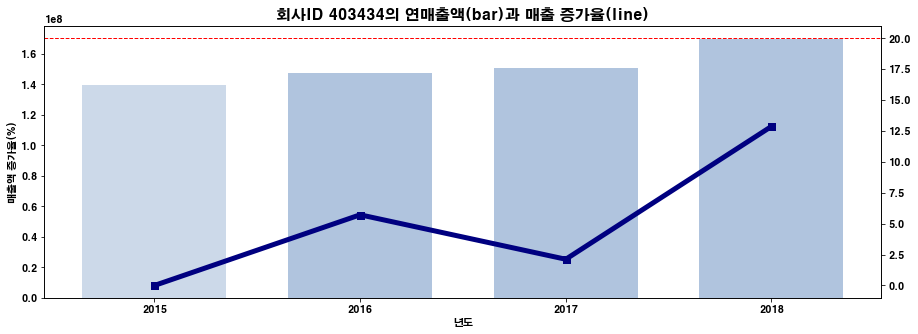

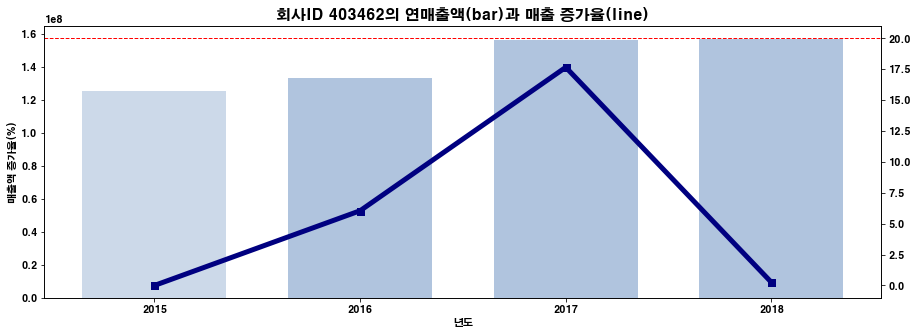

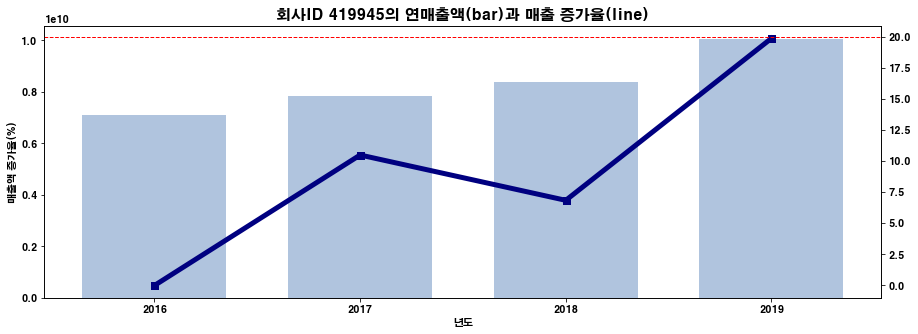

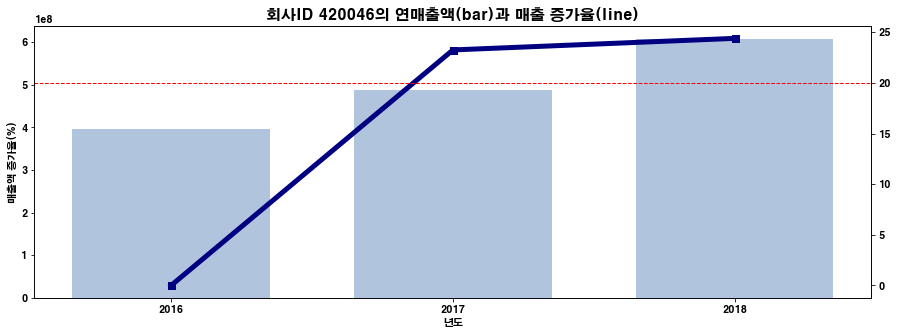

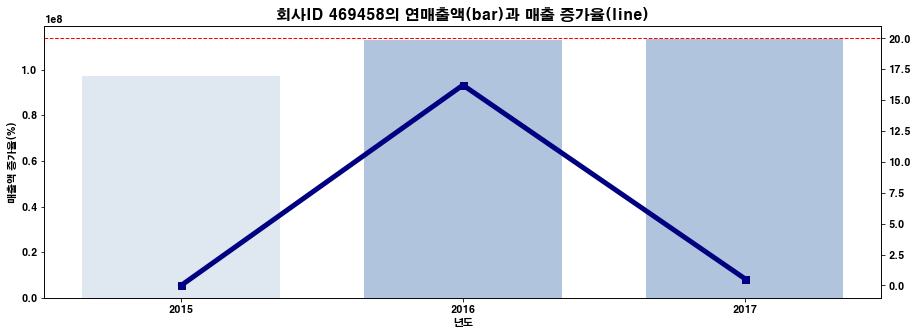

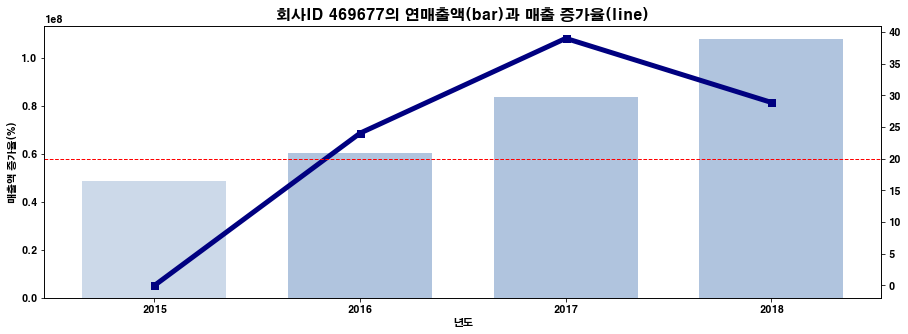

In [30]:
growth()

### 연평균 매출액 증가율

In [31]:
emp_over10

,회사ID,연매출액,연도월,년도,월,월별_연금보험료,월별_직원수,매출액증가율
0,294337,102579741,2015_11,2015,11,244699780,1202,0.0000
1,294337,102579741,2015_12,2015,12,265217820,1318,0.0000
2,294337,146274359,2016_1,2016,1,266212980,1305,42.5958
3,294337,146274359,2016_2,2016,2,274833900,1350,42.5958
4,294337,146274359,2016_3,2016,3,276378820,1350,42.5958
...,...,...,...,...,...,...,...,...
370,469677,108023614,2018_8,2018,8,126135120,545,28.8733
371,469677,108023614,2018_9,2018,9,124187640,536,28.8733
372,469677,108023614,2018_10,2018,10,127180360,547,28.8733
373,469677,108023614,2018_11,2018,11,127590260,555,28.8733


In [32]:
emp_over10.groupby('회사ID')['매출액증가율'].mean()

회사ID
294337    38.952916
294367    14.402400
294387     8.094474
403359     5.465400
403434     6.539905
403462     7.565305
419945     9.301075
420046    15.886433
469458     8.049792
469677    29.018179
Name: 매출액증가율, dtype: float64

### 마이너스 성장률이 있는 회사 : ID 294367, 294387

In [33]:
m = emp_over10.loc[emp_over10['매출액증가율'] < 0] # 마이너스 성장률 존재
m['회사ID'].unique() # 2개 회사

array([294367, 294387], dtype=int64)

In [34]:
# minus의 회사ID를 추출해서 emp_over10 df에서 해당 id 회사만 따로 추출하기
# 지금은 기업이 2개 밖에 안 나와서 복사 붙여넣기를 했지만, 많다면 함수로 만들어서 하면 됩니다!
# m['회사ID'].unique()를 리스트화 해서 for문에 넣어서 돌리면 될 거에요!

minus = emp_over10.loc[(emp_over10['회사ID'] == 294367) | (emp_over10['회사ID'] == 294387)]
minus['매출액증가율'].unique() # [  0.    , -10.9853,  18.2928,  38.3001,  15.4775,  -1.7025, 11.8575]
minus

,회사ID,연매출액,연도월,년도,월,월별_연금보험료,월별_직원수,매출액증가율
38,294367,601303965,2015_11,2015,11,218100420,852,0.0000
39,294367,601303965,2015_12,2015,12,212721720,833,0.0000
40,294367,535249090,2016_1,2016,1,213686560,836,-10.9853
41,294367,535249090,2016_2,2016,2,217537160,855,-10.9853
42,294367,535249090,2016_3,2016,3,217713360,856,-10.9853
...,...,...,...,...,...,...,...,...
109,294387,168291675,2018_8,2018,8,179467780,832,11.8575
110,294387,168291675,2018_9,2018,9,178602540,827,11.8575
111,294387,168291675,2018_10,2018,10,177921980,822,11.8575
112,294387,168291675,2018_11,2018,11,178800540,829,11.8575


In [35]:
minus.sort_values(['회사ID','년도'], inplace=True)
minus.reset_index(inplace=True)
minus.drop('index', axis=1, inplace=True)
minus

,회사ID,연매출액,연도월,년도,월,월별_연금보험료,월별_직원수,매출액증가율
0,294367,601303965,2015_11,2015,11,218100420,852,0.0000
1,294367,601303965,2015_12,2015,12,212721720,833,0.0000
2,294367,535249090,2016_1,2016,1,213686560,836,-10.9853
3,294367,535249090,2016_2,2016,2,217537160,855,-10.9853
4,294367,535249090,2016_3,2016,3,217713360,856,-10.9853
...,...,...,...,...,...,...,...,...
71,294387,168291675,2018_8,2018,8,179467780,832,11.8575
72,294387,168291675,2018_9,2018,9,178602540,827,11.8575
73,294387,168291675,2018_10,2018,10,177921980,822,11.8575
74,294387,168291675,2018_11,2018,11,178800540,829,11.8575


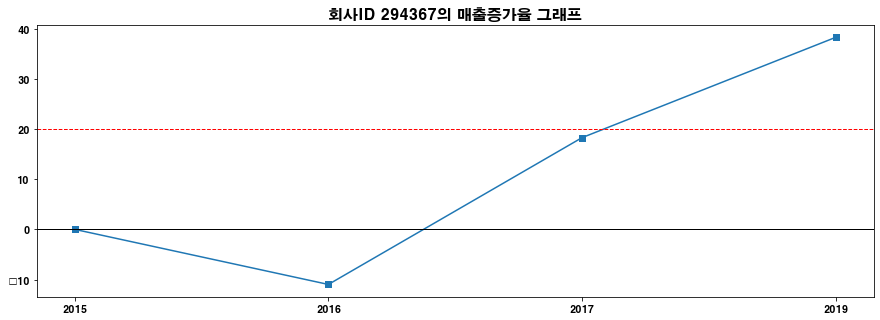

In [45]:
minus1 = minus.loc[minus['회사ID'] == 294367]


plt.plot(minus1['년도'], minus1['매출액증가율'], '-s')
plt.title('회사ID ' + str(minus1['회사ID'][0]) + '의 매출증가율 그래프', fontsize=15)
plt.axhline(y=0, color='black', linewidth=1)
plt.axhline(y=20, color='r', ls='--', linewidth=1)
plt.savefig('회사ID ' + str(minus1['회사ID'][0]) + '의 매출증가율 그래프.png')
plt.savefig('savefig_default.png')
plt.show()

In [37]:
minus2 = minus.loc[minus['회사ID'] == 294387]
minus2.reset_index(inplace=True) # 인덱스 문제로 reset 해주셔야 합니다!
minus2.drop('index',axis=1, inplace=True)

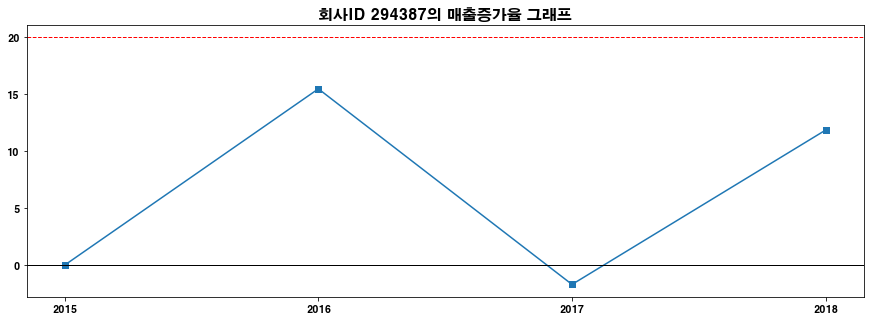

In [46]:
plt.plot(minus2['년도'], minus2['매출액증가율'], '-s')
plt.title('회사ID ' + str(minus2['회사ID'][0]) + '의 매출증가율 그래프', fontsize=15)
plt.axhline(y=0, color='black', linewidth=1)
plt.axhline(y=20, color='r', ls='--', linewidth=1)
plt.savefig('회사ID ' + str(minus2['회사ID'][0]) + '의 매출증가율 그래프.png')
plt.show()

#### %p(퍼센트포인트)로 비교
- ID 294367 : 0%(2015) => (-10.98%p) => -10.98%(2016) => (+29.27%p) => 18.29%(2017) => (+20.01%p) => 38.3%(2019)
- ID 294387 : 0%(2015) => (+15.47%p) => 15.47%(2016) => (-17.18%p) => -1.70%(2017) => (+13.5%p) => 11.8%(2018)

### 매출 성장률이 지속적으로 상승세인 회사 : 나머지 8개 기업

In [39]:
idx1 = emp_over10[emp_over10['회사ID'] == 294367].index
idx2 = emp_over10[emp_over10['회사ID'] == 294387].index

print(idx1, '\n', idx2)

Int64Index([38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54,
            55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71,
            72, 73, 74, 75],
           dtype='int64') 
 Int64Index([ 76,  77,  78,  79,  80,  81,  82,  83,  84,  85,  86,  87,  88,
             89,  90,  91,  92,  93,  94,  95,  96,  97,  98,  99, 100, 101,
            102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113],
           dtype='int64')


In [40]:
std_cor = emp_over10.drop(idx1)
std_cor = std_cor.drop(idx2)
std_cor['회사ID'].nunique()

8

In [41]:
std_cor.reset_index(inplace=True)
std_cor.drop('index',axis=1, inplace=True)
std_cor

,회사ID,연매출액,연도월,년도,월,월별_연금보험료,월별_직원수,매출액증가율
0,294337,102579741,2015_11,2015,11,244699780,1202,0.0000
1,294337,102579741,2015_12,2015,12,265217820,1318,0.0000
2,294337,146274359,2016_1,2016,1,266212980,1305,42.5958
3,294337,146274359,2016_2,2016,2,274833900,1350,42.5958
4,294337,146274359,2016_3,2016,3,276378820,1350,42.5958
...,...,...,...,...,...,...,...,...
294,469677,108023614,2018_8,2018,8,126135120,545,28.8733
295,469677,108023614,2018_9,2018,9,124187640,536,28.8733
296,469677,108023614,2018_10,2018,10,127180360,547,28.8733
297,469677,108023614,2018_11,2018,11,127590260,555,28.8733


In [ ]:
plt.plot(minus2['년도'], minus2['매출액증가율'], '-s')
plt.title('회사ID ' + str(minus2['회사ID'][0]) + '의 매출증가율 그래프', fontsize=15)
plt.axhline(y=0, color='black', linewidth=1)
plt.axhline(y=20, color='r', ls='--', linewidth=1)
plt.savefig('회사ID ' + str(minus2['회사ID'][0]) + '의 매출증가율 그래프.png')
plt.show()

In [51]:
def steady():
    s_list = std_cor['회사ID'].unique().tolist()
    
    for i in range(len(s_list)):
        st = std_cor.loc[std_cor['회사ID'] == s_list[i]]
        
        plt.plot(st['년도'], st['매출액증가율'], '-s')
        plt.axhline(y=0, color='black', linewidth=1)
        plt.axhline(y=20, color='r', ls='--', linewidth=1)
        plt.title('회사ID ' + str(s_list[i]) + '의 매출액 증가율 그래프', fontsize=15)
        plt.savefig('회사ID ' + str(s_list[i]) + '의 매출증가율 그래프.png')
        plt.show()

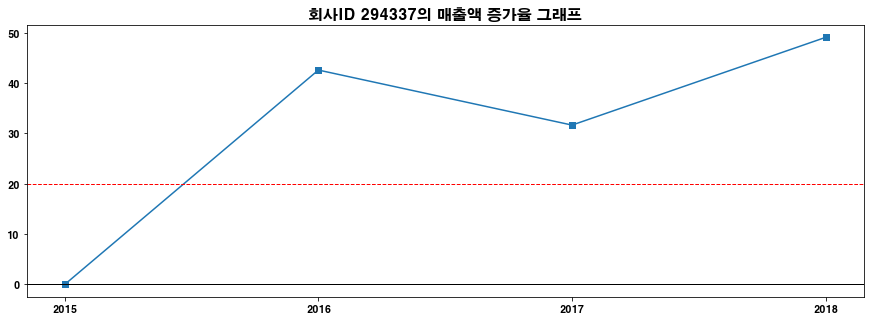

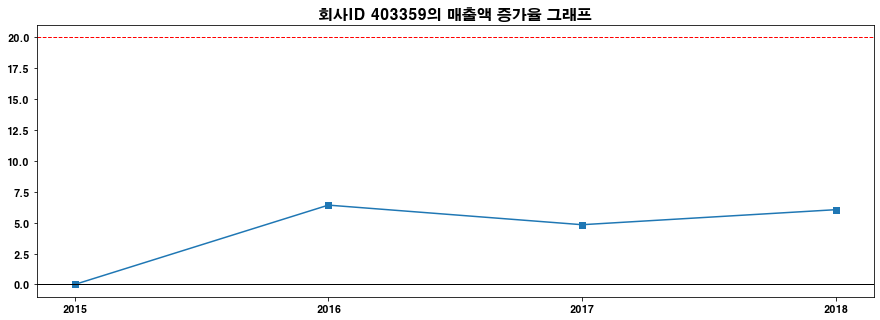

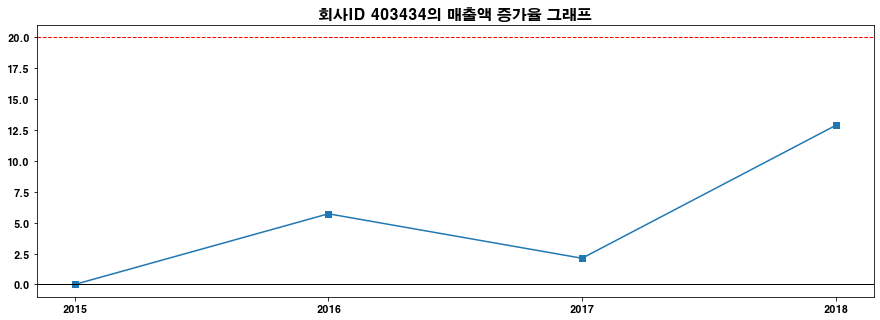

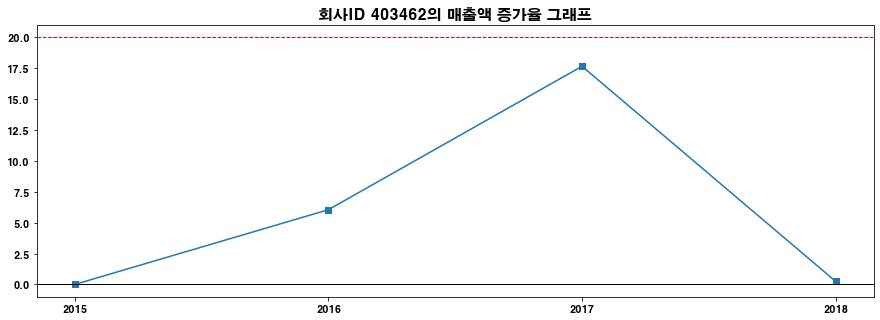

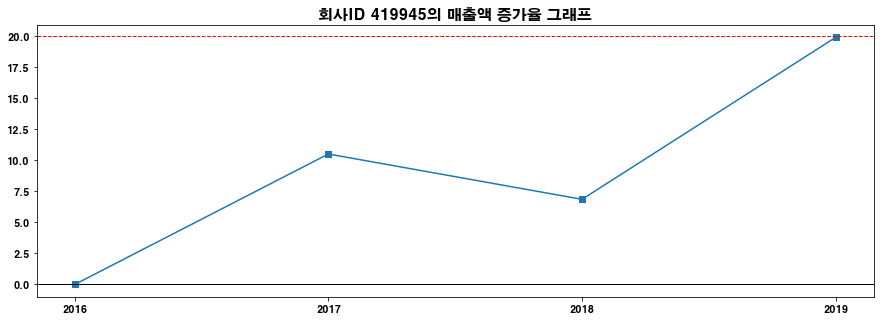

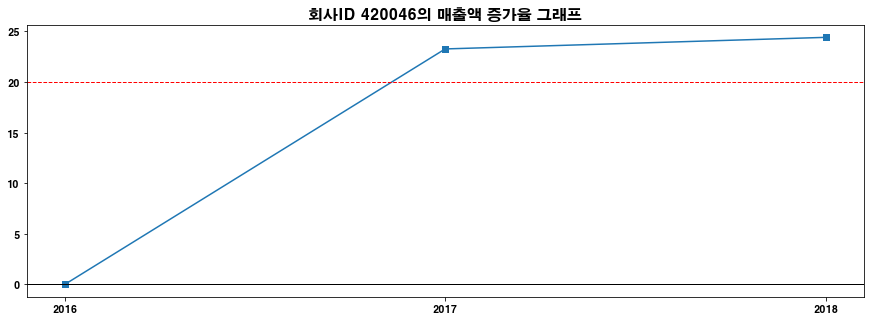

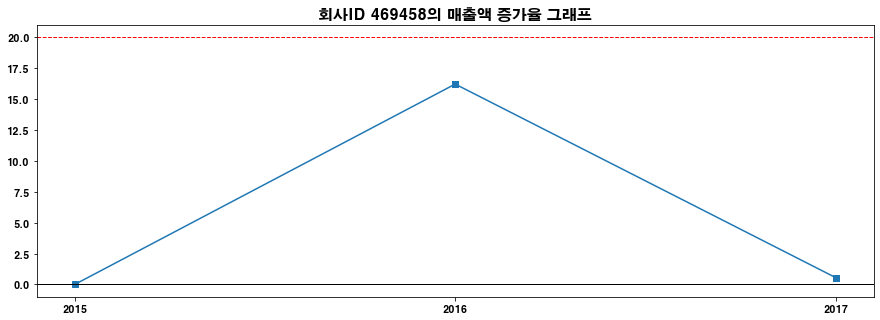

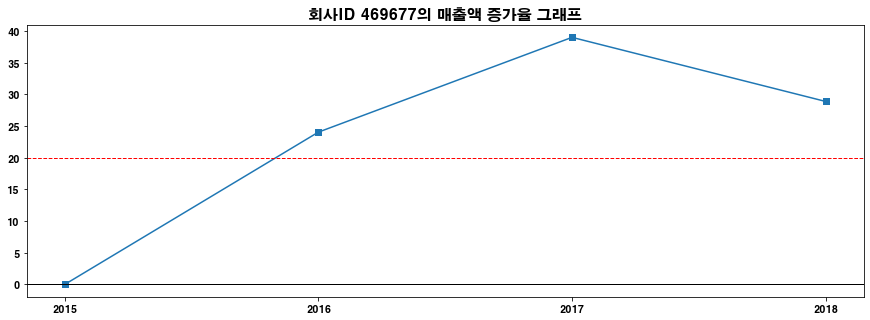

In [52]:
steady()

In [44]:
##